In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read pca data
data = pd.read_csv('/home/gabe/Desktop/caballaronia_col/processed_data/total_pca_coordinates.csv')

In [6]:
data

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,data.sample_id
0,1,-2.213656,1.557033,-0.633377,1.742277,1.558308,1.393615,-0.510711,0.461168,-0.051302,...,0.002515,-0.000809,0.003711,-9.296631e-17,-4.429798e-17,-2.135364e-16,6.481984e-17,-1.564070e-15,-2.771180e-16,11-L2_D1_GAOX1_anterior_9-21-23_0
1,2,-5.680060,-0.255089,-1.289949,0.702124,0.066326,0.780541,-0.875921,0.032213,-0.227139,...,0.004810,0.008117,0.000264,-6.337357e-17,-1.038526e-16,-2.841175e-16,-1.096653e-17,2.287721e-15,-3.509670e-16,11-L2_D1_GAOX1_anterior_9-21-23_1
2,3,-5.685765,-1.561546,-0.998966,0.377634,-1.257240,0.281043,-0.511532,0.328982,0.000998,...,-0.000575,-0.006528,0.000122,-6.067441e-17,2.042954e-17,-2.939122e-16,-1.112068e-16,-1.653191e-15,-5.665083e-16,11-L2_D1_GAOX1_anterior_9-21-23_2
3,4,-5.791179,1.150421,-0.503537,0.954405,0.058541,0.463927,-0.535209,-0.441434,-0.325786,...,-0.006638,0.044974,-0.001144,-1.062820e-16,-5.205611e-17,-3.332060e-16,8.730157e-17,1.242821e-15,-1.407623e-16,11-L2_D1_GAOX1_anterior_9-21-23_3
4,5,-5.371086,0.385213,-1.510997,1.168607,-0.132651,0.626527,-0.204211,-0.014420,-0.529100,...,0.005294,0.072687,-0.000011,2.569977e-18,-3.117794e-17,-1.306844e-16,-7.336102e-17,6.744822e-16,-3.580577e-16,11-L2_D1_GAOX1_anterior_9-21-23_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,-4.414120,2.354021,1.589310,0.278705,0.218484,0.685302,-0.509569,-0.134661,-0.286257,...,0.006904,-0.000777,-0.000886,-8.420095e-17,6.550866e-17,-3.916594e-16,2.250432e-17,-6.201636e-17,7.173477e-18,20-L2_D3_GAOX1_rfp_posterior_7-2_0
166,167,-3.944228,2.574494,-1.289877,1.357241,0.451823,0.481230,-0.035409,-0.080124,-0.316716,...,-0.003567,-0.015773,0.001537,7.886501e-17,-7.561864e-17,-2.904055e-16,-4.953412e-16,5.331022e-16,-4.875558e-16,20-L2_D3_GAOX1_rfp_posterior_7-2_1
167,168,-5.947293,0.413481,0.355049,0.814778,0.082399,0.381498,-0.815628,-0.454330,-0.237776,...,0.003292,-0.018963,0.000776,-7.095316e-17,5.836886e-17,-2.706121e-16,3.512546e-17,8.282220e-16,-7.527496e-16,20-L2_D3_GAOX1_rfp_posterior_7-2_2
168,169,-2.020851,-0.106127,4.129630,-0.637383,0.210894,0.553578,0.079240,-0.496340,-0.107787,...,-0.002652,0.000518,-0.000024,-1.307970e-17,1.571127e-17,-2.021139e-16,1.542785e-16,-2.195509e-16,9.921078e-17,20-L2_D3_GAOX1_rfp_posterior_7-2_3


In [13]:
days = []
position = []
for sample_id in list(data['data.sample_id']):
    #add day
    day = sample_id.split('_')[1].split('-')[0]
    days.append(day)
    #add position
    
    if 'medial' in sample_id or 'MedialM' in sample_id or 'Medial' in sample_id:
        position.append('Medial')
    elif 'posterior' in sample_id or 'Posterior' in sample_id:
        position.append('Posterior')
    elif 'anterior' in sample_id or 'anterio' in sample_id:
        position.append('Anterior')

        
    
data['Position'] = position
data['Days'] = days

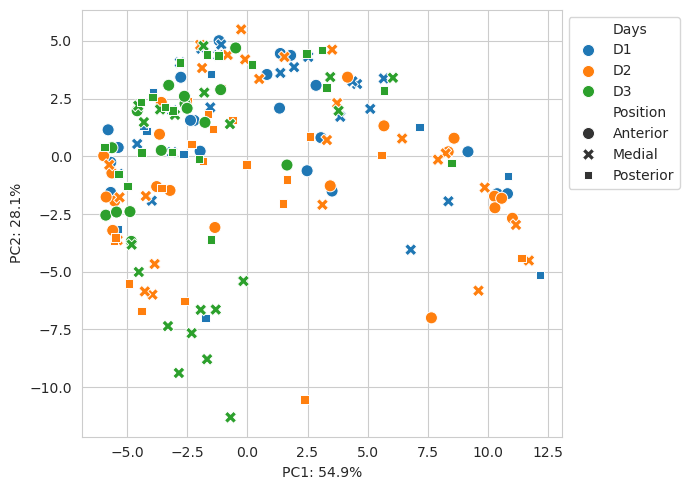

In [18]:
#plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

#hue_order = ['Aposymbiotic', 'Heat killed', 'PFA killed', 'Symbiotic (GAOX1)']
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Days', style='Position', 
                ax=ax, s=75, palette='tab10')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel('PC1: 54.9%')
ax.set_ylabel('PC2: 28.1%')

plt.tight_layout()
plt.savefig('/home/gabe/Desktop/caballaronia_col/figures/pca_caballaronia_by_day.pdf')